<h1>Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros((X[0].shape[0]))
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    return result

x = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
v = [np.array([2, 3]), np.array([5, 6])]

print(sum_prod(x, v))

[ 69. 101.]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

print(binarize(np.array([[0.2, 0.6], [0.8, 0.1]])))


[[0 1]
 [1 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def unique_rows(mat):
   return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]

print(unique_rows(np.array([[2,2],[3,3]])))
print(unique_columns(np.array([[1,3],[1,4]])))

[array([2]), array([3])]
[array([1]), array([3, 4])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Мат ожидания для строк: [ 0.64188132  0.13376543 -0.43142974]
Дисперсии для строк: [2.25732824 0.43924208 0.83191603]
Мат ожидания для столбцов: [-0.20989988 -0.48441429  1.06072923  0.09254095]
Дисперсии для столбцов: [0.79790285 0.09290283 2.11399018 1.10880903]


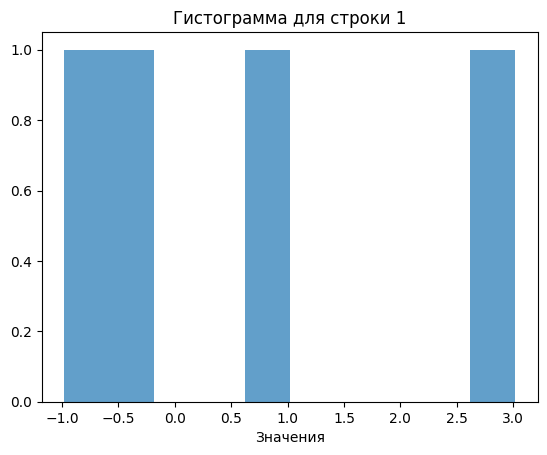

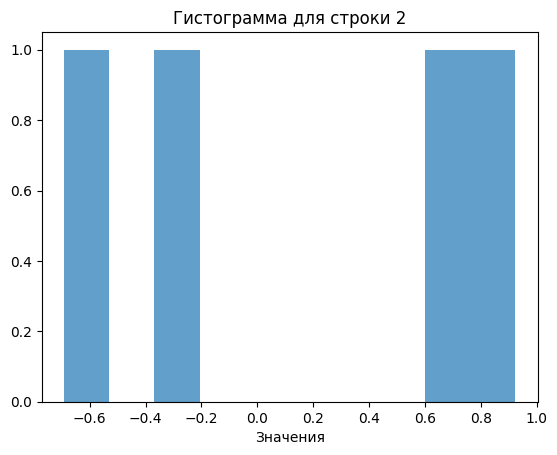

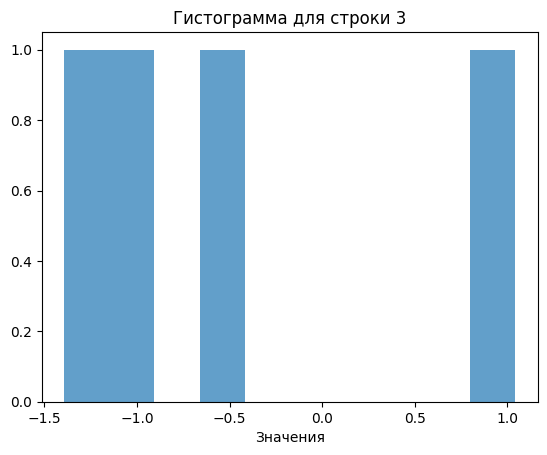

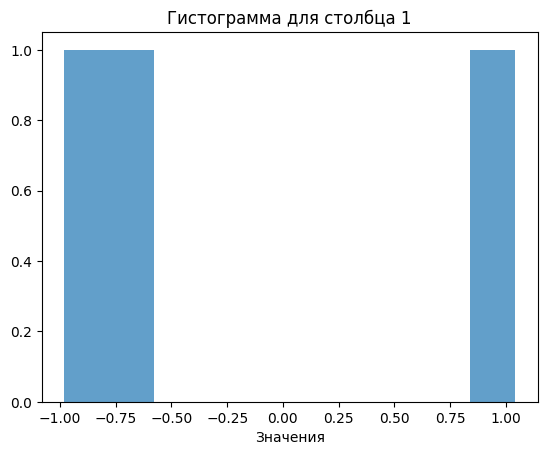

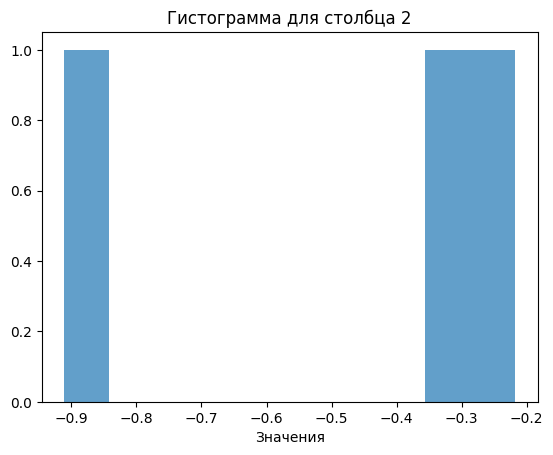

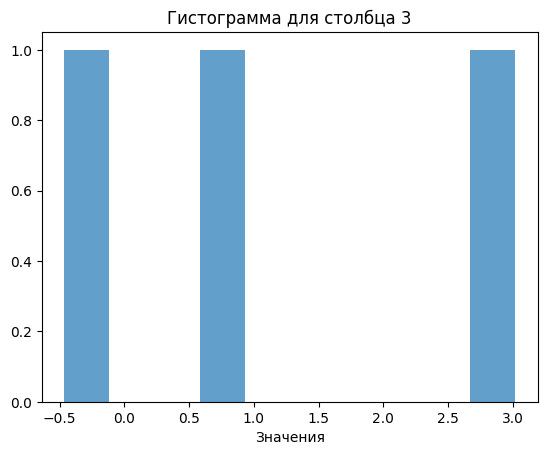

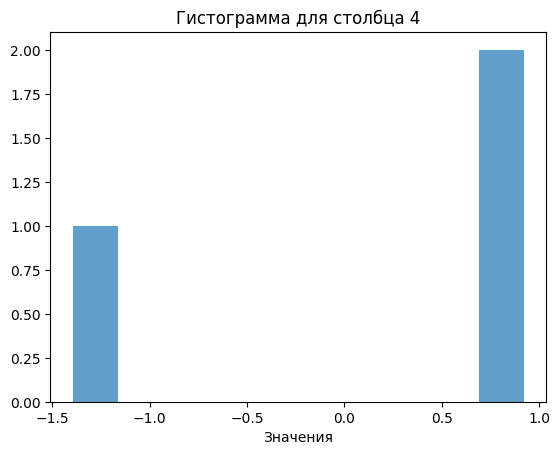

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def func(m, n):
    mat = np.random.randn(m, n)

    row_means = np.mean(mat, axis=1)
    row_vars = np.var(mat, axis=1)
    col_means = np.mean(mat, axis=0)
    col_vars = np.var(mat, axis=0)

    print(f"Мат ожидания для строк: {row_means}")
    print(f"Дисперсии для строк: {row_vars}")
    print(f"Мат ожидания для столбцов: {col_means}")
    print(f"Дисперсии для столбцов: {col_vars}")

    for i in range(m):
        plt.hist(mat[i, :], bins=10, alpha=0.7)
        plt.title(f"Гистограмма для строки {i+1}")
        plt.xlabel("Значения")
        plt.show()

    for j in range(n):
        plt.hist(mat[:, j], bins=10, alpha=0.7)
        plt.title(f"Гистограмма для столбца {j+1}")
        plt.xlabel("Значения")
        plt.show()


func(3, 4)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def chess(m, n, a, b):
    mat = np.zeros((m, n), dtype=int)
    mat[::2, ::2] = a
    mat[1::2, 1::2] = a
    mat[::2, 1::2] = b
    mat[1::2, ::2] = b

    return mat

chess(4, 4, 6, 9)

array([[6, 9, 6, 9],
       [9, 6, 9, 6],
       [6, 9, 6, 9],
       [9, 6, 9, 6]])

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

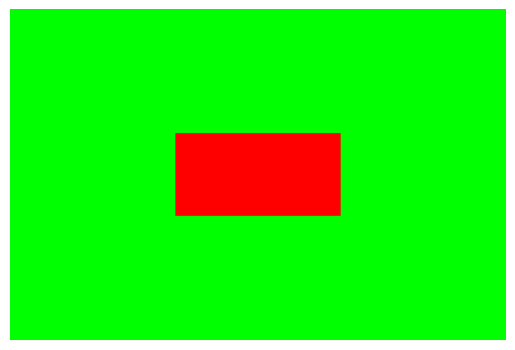

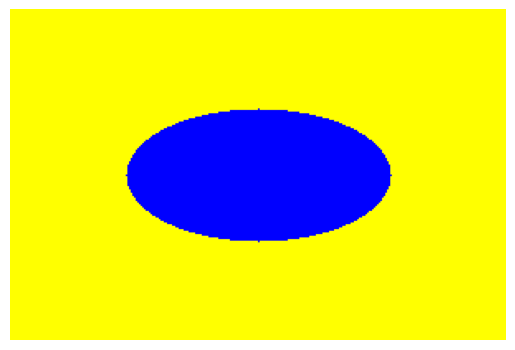

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((m, n, 3), dtype=np.uint8) * np.array(background_color, dtype=np.uint8)
    start_x = (n - a) // 2
    start_y = (m - b) // 2

    image[start_y:start_y + b, start_x:start_x + a] = rectangle_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3), dtype=np.uint8) * np.array(background_color, dtype=np.uint8)
    x0, y0 = n // 2, m // 2

    for y in range(m):
        for x in range(n):
            # Уравнение эллипса
            if ((x - x0)**2 / a**2) + ((y - y0)**2 / b**2) <= 1:
                image[y, x] = ellipse_color

    plt.imshow(image)
    plt.axis('off')
    plt.show()


draw_rectangle(100, 50, 200, 300, [255, 0, 0], [0, 255, 0])  # Красный прямоугольник на зеленом фоне
draw_ellipse(80, 40, 200, 300, [0, 0, 255], [255, 255, 0])  # Синий эллипс на желтом фоне

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def analyze_time_series(series, p):
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)

    local_max_indices, _ = find_peaks(series)
    local_maxima = series[local_max_indices]

    local_min_indices, _ = find_peaks(-series)
    local_minima = series[local_min_indices]

    moving_average = np.convolve(series, np.ones(p)/p, mode='valid')

    return {
        "Математическое ожидание": mean,
        "Дисперсия": variance,
        "СКО": std_dev,
        "локальный максимум": local_maxima,
        "локальный минимум": local_minima,
        "Вычисление скользящего среднего с размером окна p": moving_average
    }

series = np.array([1, 3, 7, 1, 2, 6, 0, 1, 3, 4, 2, 5, 0])
p = 3
print(analyze_time_series(series, p))

{'Математическое ожидание': 2.6923076923076925, 'Дисперсия': 4.674556213017752, 'СКО': 2.1620722034700304, 'локальный максимум': array([7, 6, 4, 5]), 'локальный минимум': array([1, 0, 2]), 'Вычисление скользящего среднего с размером окна p': array([3.66666667, 3.66666667, 3.33333333, 3.        , 2.66666667,
       2.33333333, 1.33333333, 2.66666667, 3.        , 3.66666667,
       2.33333333])}


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def one_hot(vector):
    num_classes = np.max(vector) + 1
    one_hot = np.zeros((len(vector), num_classes), dtype=int)
    one_hot[np.arange(len(vector)), vector] = 1

    return one_hot

print(one_hot( [0, 2, 3, 0]))


[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
